<a href="https://colab.research.google.com/github/parulsharma098/Cardiovascular-Risk-Prediction/blob/main/CARDIOVASCULAR_RISK_PREDICTION_CAPSTONE_III(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b><u>Project Title : Predicting the Risk Of Cardiovascular Diseases</u></b>





***Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels.***


##**Problem Description**

*The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.The dataset provides the patient's information. It includes
over 4,000 records and 15 attributes.*



## **Objective**

*The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD).*

In [34]:
%%html
<marquee style='width: 100%; color: green;'><b><u>Cardiovascular Risk Prediction</b></u></marquee>

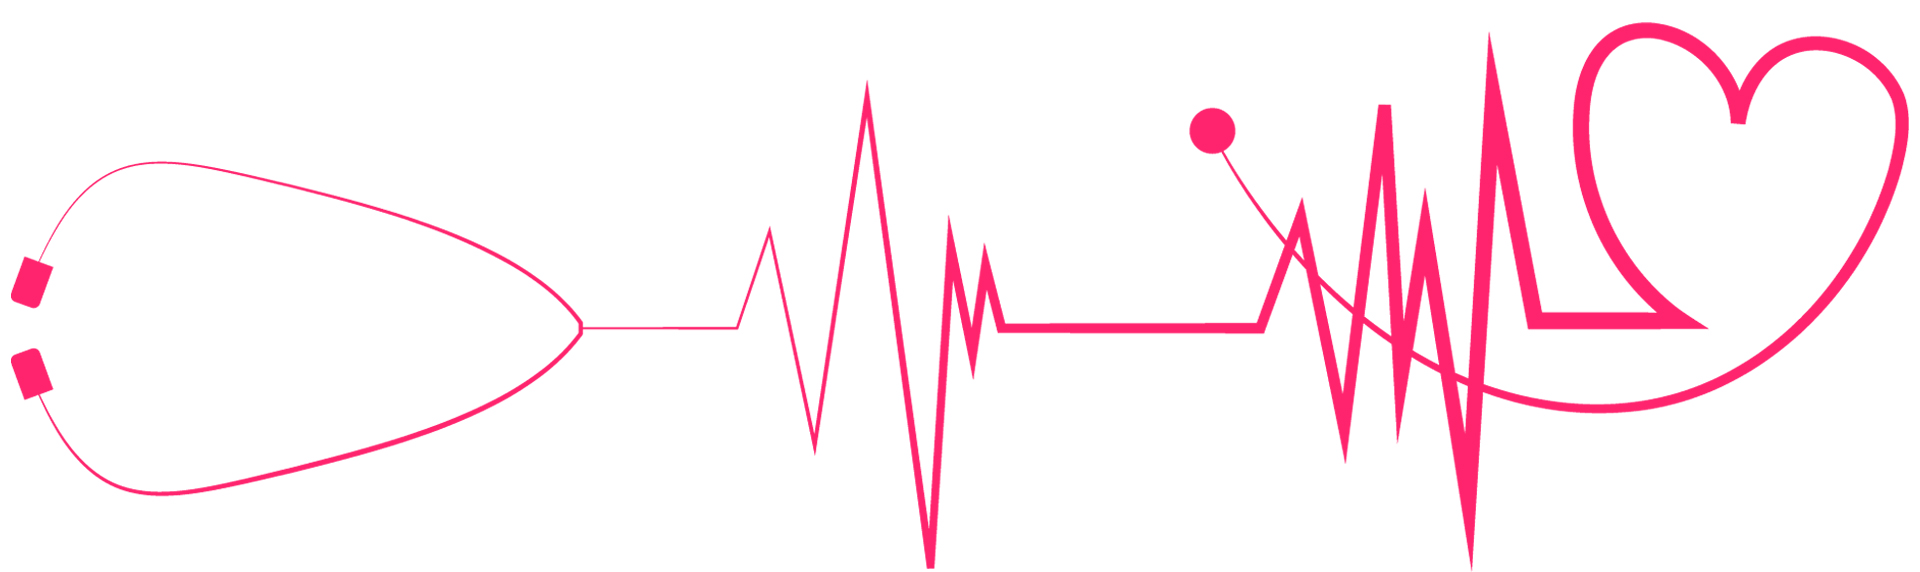

##**Key Facts:**



*   *Cardiovascular diseases (CVDs) are the **leading** cause of **death** globally, taking an estimated **17.9 million** people died from CVDs in **2019**, representing **32%** of all **global deaths**. Of these deaths, **85% were due to heart attack and stroke**.* 
*   *More than **four out of five CVD deaths** are due to **heart attacks** and **strokes**, and **one third of these deaths** occur prematurely in people under **70 years of age**.*
*   *The most important behavioural **risk factors** of heart disease and stroke are **unhealthy diet, physical inactivity, tobacco use and harmful use of alcohol**.*
*   *Over **three quarters** of CVD deaths take place in **low- and middle-income countries**.*







## **Importing Libraries**

*To do any type of basic analysis or visualization we will be needing some modules or librabies for outcomes. We will be importing libraries like Pandas,numpy(for data manipulation),matplotlib and seaborn(for data visualization).*

In [35]:
#Importing data manipulation libraries.
import pandas as pd
import numpy as np

#The warnings module handles warnings in Python. 
#It would be helpful in throwing away warnings caused.
import warnings
warnings.filterwarnings('ignore')

#Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Loading the Data**

*In this section, we will be importing our data from the google drive and perform some usual data analysis on it later on.*

In [36]:
#Mounting the Google Drive to access the data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
#The variable 'path' contains the path of dataset stored in drive.
#Importing Cardiovascular risk Data File.
path ='/content/drive/MyDrive/CARDIOVASCULAR RISK PREDICTION/'
df = pd.read_csv(path + 'data_cardiovascular_risk.csv',index_col='id')

#Showing the dataframe.
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


## **Variables**

###***Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.***


#**Data Description**

###***Demographic:***

*• **Sex:** male or female("M" or "F")*

*• **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)*

###***Behavioral:***

*• **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")*

*• **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)*

###***Medical( history):***

*• **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)*

*• **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)*

*• **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)*

*• **Diabetes:** whether or not the patient had diabetes (Nominal)*

###***Medical(current):***

*• **Tot Chol:** total cholesterol level (Continuous)*

*• **Sys BP:** systolic blood pressure (Continuous)*

*• **Dia BP:** diastolic blood pressure (Continuous)*

*• **BMI:** Body Mass Index (Continuous)*

*• **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)*

*• **Glucose:** glucose level (Continuous)*

###***Predict variable (desired target):***

***• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”
, “0” means “No”) -
DEPENDANT VARIABLE***

## **Data Inspection**

*Here, we will be performing basic and initial analysis on our raw data to check the data inside of each provided column, check the data type of each column and shape of our data.*

In [38]:
#Checking the first 5 rows.
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [39]:
#Checking the last 5 rows.
df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [40]:
#Checking the shape of the data.
df.shape

(3390, 16)

In [41]:
#Checking for the title of all the columns.
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

**Before proceeding further, let's rename our columns for a better understanding and better efficiency.**

In [42]:
#Renaming the columns for a better view and understanding.
df.rename(columns={'sex':'Gender','is_smoking':'smoking','cigsPerDay':'cigarettes/day','BPMeds':'BP_meds',
                   'prevalentStroke':'stroke','prevalentHyp':'hypertensive',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'10yearCHD'},
          inplace = True)

In [43]:
#Updated Dataset after renaming all the columns.
df.head(2)

,age,education,Gender,smoking,cigarettes/day,BP_meds,stroke,hypertensive,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,10yearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0


In [44]:
#Checking for null entries and data type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   education          3303 non-null   float64
 2   Gender             3390 non-null   object 
 3   smoking            3390 non-null   object 
 4   cigarettes/day     3368 non-null   float64
 5   BP_meds            3346 non-null   float64
 6   stroke             3390 non-null   int64  
 7   hypertensive       3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3352 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3376 non-null   float64
 13  heart_rate         3389 non-null   float64
 14  glucose            3086 non-null   float64
 15  10yearCHD          3390 non-null   int64  
dtypes: float64(9), int64(5),

*It is seen that there are **3390 rows and 16 columns**.There are some **NULL values** present in **"education","cigsPerDay","BPMeds","totChol","BMI","heartRate"and "glucose"**.There are **9 float type** columns,**4 int type** columns and **2 object type** columns. **"10yearCHD" is our Target or Dependant variable**.*

In [45]:
#Statistical description of all the columns present in the dataset.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
Gender,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigarettes/day,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BP_meds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
stroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
hypertensive,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0
total_cholesterol,3352.0,NaN,NaN,NaN,237.074284,45.24743,107.0,206.0,234.0,264.0,696.0


In [46]:
#Sum of all the null values present in each column.
for i in df.columns.tolist():
  print("Total missing values in",i,":",df[i].isna().sum())

Total missing values in age : 0
Total missing values in education : 87
Total missing values in Gender : 0
Total missing values in smoking : 0
Total missing values in cigarettes/day : 22
Total missing values in BP_meds : 44
Total missing values in stroke : 0
Total missing values in hypertensive : 0
Total missing values in diabetes : 0
Total missing values in total_cholesterol : 38
Total missing values in systolic_bp : 0
Total missing values in diastolic_bp : 0
Total missing values in bmi : 14
Total missing values in heart_rate : 1
Total missing values in glucose : 304
Total missing values in 10yearCHD : 0


In [47]:
#Sum of the null values overall.
print("Overall missing values are",df.isna().sum().sum())

Overall missing values are 510


In [48]:
#Calculating the percentage of NULL values in each column.
totalN = df.isna().sum().sort_values(ascending=False)
percentage = (df.isna().sum()/df.isna().count()).sort_values(ascending=False) * 100
missing_v = pd.concat([totalN, percentage], axis=1, keys=['Total', 'Percentage'])
missing_v

,Total,Percentage
glucose,304,8.967552
education,87,2.566372
BP_meds,44,1.297935
total_cholesterol,38,1.120944
cigarettes/day,22,0.648968
bmi,14,0.412979
heart_rate,1,0.029499
age,0,0.000000
Gender,0,0.000000
smoking,0,0.000000


In [49]:
#Checking for the duplicated entries in the dataset.
MissV = len(df[df.duplicated()])
print("There are",MissV, "duplicate values.")

There are 0 duplicate values.


***There are no duplicates present in the dataset but there are 510 missing values overall.***

*Let's Visualize the Null values for a clearer Picture.*

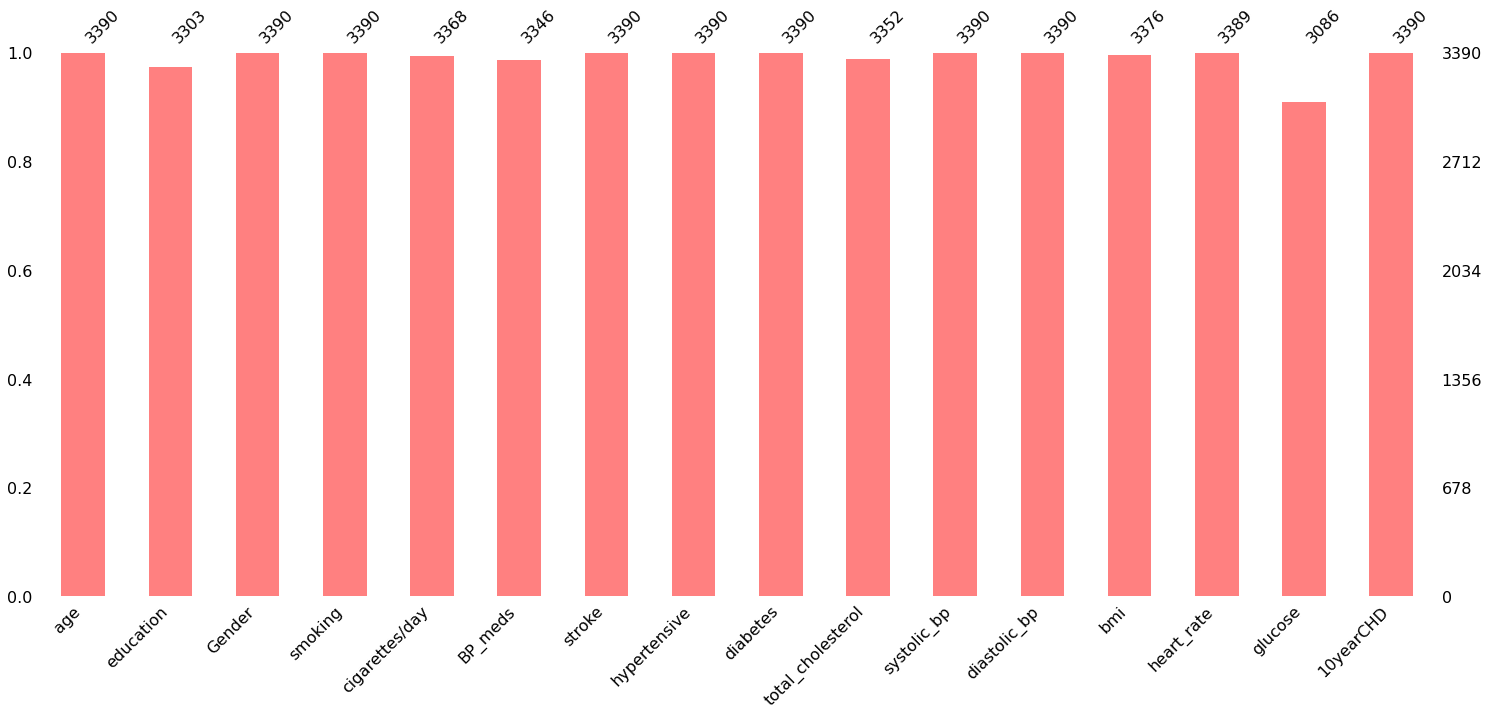

In [50]:
#importing missingno for visualizing the null values.
import missingno as misno

# Visualizing the number of missing values as a bar chart
misno.bar(df,color=(1, 0.5, 0.5))

*This bar chart is clearly showing that **glucose** and **education** have the most significant null values which can majorly affect our model building process and can also affect the predictions later.*

# **Handling Missing Values**

In [51]:
# Replacing the missing values in the categorical columns with its mode.
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [52]:
# education distribution after mode imputation
df.education.value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [53]:
df['education'].isna().sum()

0

#**Exploratary Data Analysis**

*Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.*

**

In [54]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print(i,":",df[i].nunique())

age : 39
education : 4
Gender : 2
smoking : 2
cigarettes/day : 32
BP_meds : 2
stroke : 2
hypertensive : 2
diabetes : 2
total_cholesterol : 240
systolic_bp : 226
diastolic_bp : 142
bmi : 1259
heart_rate : 68
glucose : 132
10yearCHD : 2


*Since, It's very clear by  finding out all the unique values in the dataset that there are multiple continuous and categorical features present. we will be seperating categorical, numerical and target variable in individual variables for better exploration and analysis.*

In [55]:
# Extracting categorical features.

cat_features = ['education','Gender','smoking','BP_meds','stroke','hypertensive','diabetes']
print(f'There are {len(cat_features)} Categorical Features.')

There are 7 Categorical Features.


In [56]:
#All the Categorical features.
cat_features

['education',
 'Gender',
 'smoking',
 'BP_meds',
 'stroke',
 'hypertensive',
 'diabetes']

In [57]:
#head of the Categorical columns.
df[cat_features].head()

,education,Gender,smoking,BP_meds,stroke,hypertensive,diabetes
id,,,,,,,
0,2.0,F,YES,0.0,0,0,0
1,4.0,M,NO,0.0,0,1,0
2,1.0,F,YES,0.0,0,0,0
3,1.0,M,YES,0.0,0,1,0
4,1.0,F,YES,0.0,0,0,0


In [58]:
# Extracting numerical features.

num_features = ['age','cigarettes/day','total_cholesterol','systolic_bp','diastolic_bp','bmi','heart_rate','glucose']
print(f'There are {len(num_features)} Numerical Features.')

There are 8 Numerical Features.


In [59]:
#All the numerical features.
num_features

['age',
 'cigarettes/day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

In [60]:
#first five rows of numerical columns.
df[num_features].head()

,age,cigarettes/day,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose
id,,,,,,,,
0,64,3.0,221.0,148.0,85.0,NaN,90.0,80.0
1,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,20.0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,30.0,241.0,136.5,85.0,26.42,70.0,77.0


In [61]:
#Storing the dependant variable in a seperate variable for later on.
dep_feature = df['10yearCHD']
dep_feature

id
0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: 10yearCHD, Length: 3390, dtype: int64

#**Univariate Analysis**

*Univariate analysis explores variables (attributes) one by one. Variables could be either categorical or numerical.“Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.There are different statistical and visualization techniques of investigation for each type of variable.Here we will be using distplots and boxplots.*

## **Univariate analysis for Numerical Features**

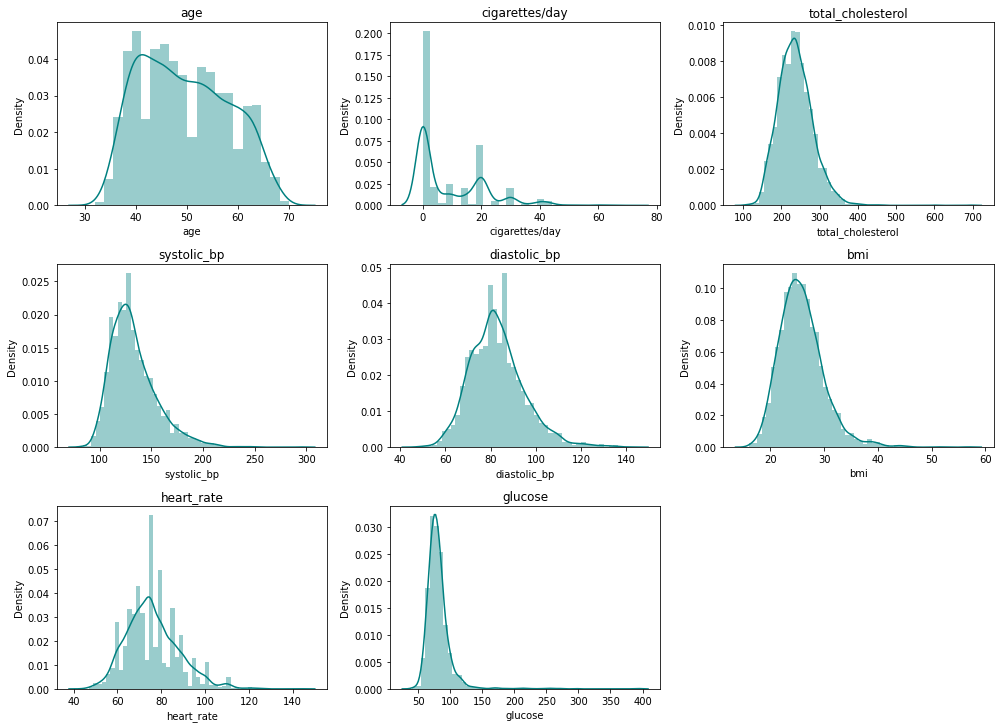

In [62]:
# Making distribution plot for Numerical features for checking the skewness.

n=1
plt.figure(figsize=(14,40))
for i in num_features:
  plt.subplot(12,3,n)
  n= n+1
  sns.distplot(df[i],color='teal')
  plt.title(i)
  plt.tight_layout()

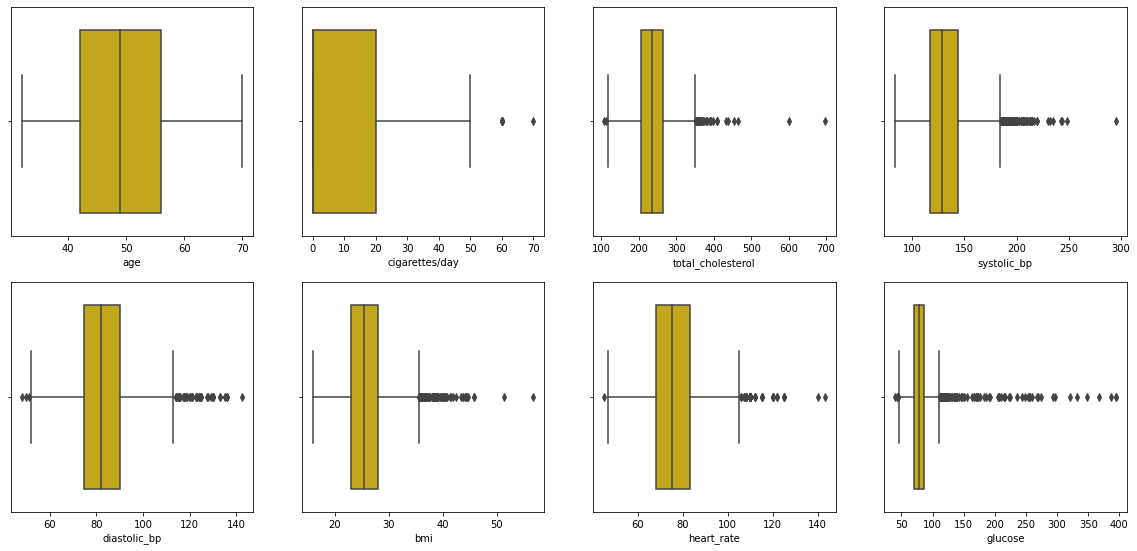

In [63]:
# plotting boxplot for each numerical feature to check for the outliers.

plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in num_features:
    ax = plt.subplot(12,4,plotnumber)
    sns.boxplot(df[numerical_feature], color='#DEB800')
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()

*Both **Gender** and **smoking** have "Object" type inputs in the columns, we will be converting them into binary form like other categorical features.*

In [64]:
# Encoding the categorical into binary columns.

df['Gender'] = np.where(df['Gender'] == 'M',1,0)
df['smoking'] = np.where(df['smoking'] == 'YES',1,0)